In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
wa_df=pd.read_csv('/content/drive/MyDrive/Logestic_Regression/wa_churn.csv') 

In [ ]:
wa_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
wa_df.shape

(7043, 21)

In [ ]:
wa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
wa_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
wa_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
wa_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
X=wa_df.drop(['customerID','Churn'], axis=1)
y=wa_df['Churn'].map({'No':0,'Yes':1})

In [ ]:
wa_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

My classes are imbalanced. The accuracy score is not helpful to evaluate the performance of the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
columns=[]
for column in X.columns:
    if X[column].dtype=='object':
        columns.append(column)
print(columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [ ]:
# create the transformer
transformer=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),columns),
                                   remainder=StandardScaler())

In [ ]:
#create the pipe
logreg_pipe=Pipeline(
            steps=[('transformer',transformer),
                ('model',LogisticRegression(solver='lbfgs', max_iter=400))])
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                    

### Other way

In [ ]:
# define categorical and numeric transformers
numeric_transformer = Pipeline(steps=[('knnImputer', KNNImputer(n_neighbors=2, weights="uniform", )),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
# dispatch object columns to the categorical_transformer and remaining columns to numerical_transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, make_column_selector(dtype_exclude="object")),
    ('cat', categorical_transformer, make_column_selector(dtype_include="object"))
])

In [ ]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lr_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs', max_iter=400))])
lr_pipe.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knnImputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f64b789b910>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
              

In [ ]:
lr_preds=lr_pipe.predict(X_test)
logreg_preds=logreg_pipe.predict(X_test)

In [ ]:
confusion_matrix(lr_preds,y_test)

array([[1390,  247],
       [ 149,  327]])

In [ ]:
print(classification_report(lr_preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1637
           1       0.57      0.69      0.62       476

    accuracy                           0.81      2113
   macro avg       0.74      0.77      0.75      2113
weighted avg       0.83      0.81      0.82      2113



In [ ]:
confusion_matrix(logreg_preds,y_test)

array([[1390,  247],
       [ 149,  327]])

In [ ]:
print(classification_report(logreg_preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1637
           1       0.57      0.69      0.62       476

    accuracy                           0.81      2113
   macro avg       0.74      0.77      0.75      2113
weighted avg       0.83      0.81      0.82      2113



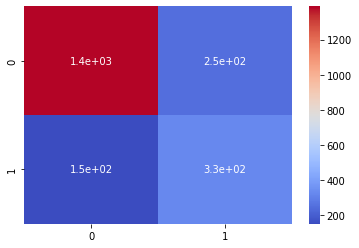

In [ ]:
sns.heatmap(confusion_matrix(logreg_preds,y_test), annot=True, cmap='coolwarm')

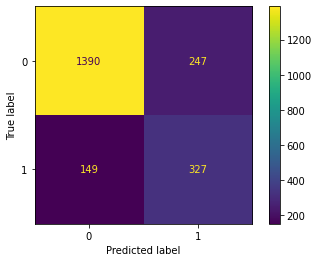

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix(logreg_preds,y_test))
disp.plot()
plt.show()

In [ ]:
probs=lr_pipe.predict_proba(X_test)
probs

array([[0.33842496, 0.66157504],
       [0.91789143, 0.08210857],
       [0.99235052, 0.00764948],
       ...,
       [0.99195016, 0.00804984],
       [0.46479046, 0.53520954],
       [0.77071723, 0.22928277]])

In [ ]:
new_preds=np.where(probs[:,1]>=0.4,1,0)

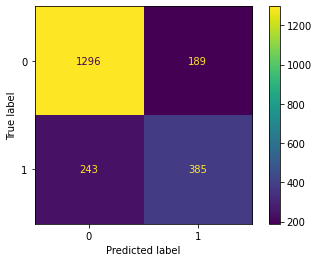

In [ ]:
new_disp=ConfusionMatrixDisplay(confusion_matrix(new_preds,y_test))
new_disp.plot()
plt.show()

In [ ]:
new_preds=np.where(probs[:,0]>=0.7,0,1)

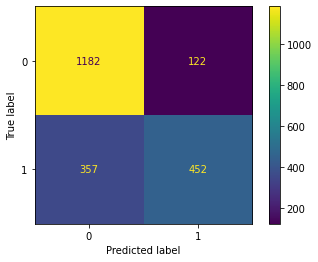

In [ ]:
new_disp=ConfusionMatrixDisplay(confusion_matrix(new_preds,y_test))
new_disp.plot()
plt.show()

In [ ]:
fp=0
for i,j in list(zip(new_preds,y_test)):
  if i==0:
    if j==1:
      fp+=1
print(fp)

122


### Additional from Dr. Gomez Class

In [ ]:
wa_df['TotalCharges'] = wa_df['TotalCharges'].replace(' ', np.nan).astype('float')
wa_df = wa_df.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wa_df.drop(['Churn', 'customerID'], axis = 1), wa_df['Churn'], random_state = 442,
                                                   stratify = wa_df['Churn'])

In [ ]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [ ]:
lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f64b78de2e0>)])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
train_accu=lgr_pipe.score(X_train,y_train)
test_accu=lgr_pipe.score(X_test,y_test)
train_accu,test_accu

(0.80128934395146, 0.8179749715585893)

In [ ]:
lr_preds=lgr_pipe.predict(X_test)
confusion_matrix(lr_preds,y_test)

array([[1165,  194],
       [ 126,  273]])

In [ ]:
print(classification_report(lr_preds,y_test))

              precision    recall  f1-score   support

          No       0.90      0.86      0.88      1359
         Yes       0.58      0.68      0.63       399

    accuracy                           0.82      1758
   macro avg       0.74      0.77      0.75      1758
weighted avg       0.83      0.82      0.82      1758



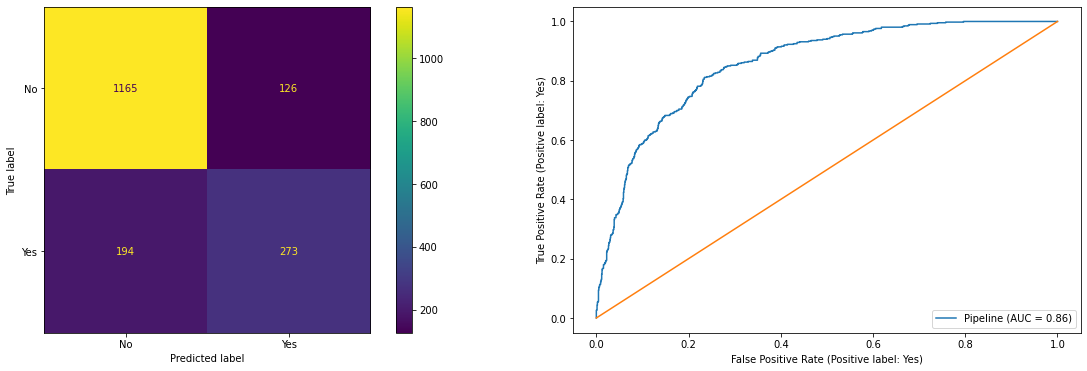

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [ ]:
probs=lgr_pipe.predict_proba(X_test)
pd.DataFrame(probs, columns=['prob0','prob1'])


,prob0,prob1
0,0.671212,0.328788
1,0.610288,0.389712
2,0.923462,0.076538
3,0.979878,0.020122
4,0.770357,0.229643
...,...,...
1753,0.953005,0.046995
1754,0.817300,0.182700
1755,0.472952,0.527048
1756,0.921609,0.078391


In [ ]:
str_preds=np.where(probs[:,1]>0.5,'Yes', 'No')
str_preds

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype='<U3')

In [ ]:
fp=0
for i,j in zip(str_preds,y_test):
  if i=='Yes':
    if j=='No':
      fp+=1
print(fp)


126


In [ ]:
fn=0
for i,j in zip(str_preds,y_test):
  if i=='No':
    if j=='Yes':
      fn+=1
print(fn)

194


In [ ]:
new_preds=np.where(probs[:,1]>0.7,'Yes', 'No')
new_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [ ]:
fp=0
for i,j in zip(new_preds,y_test):
  if i=='Yes':
    if j=='No':
      fp+=1
print(fp)

23


In [ ]:
fn=0
for i,j in zip(new_preds,y_test):
  if i=='No':
    if j=='Yes':
      fn+=1
print(fn)

382


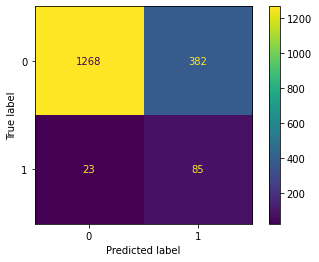

In [ ]:
new_disp=ConfusionMatrixDisplay(confusion_matrix(new_preds,y_test))
new_disp.plot()
plt.show()

In [ ]:
no_probs = lgr_pipe.predict_proba(X_test)[:, 0]
no_probs

array([0.6712121 , 0.6102876 , 0.92346163, ..., 0.4729523 , 0.92160913,
       0.97750556])

In [ ]:
high_prob_no = no_probs[no_probs > 0.8]
high_prob_no[:5]

array([0.92346163, 0.97987776, 0.93124674, 0.99276972, 0.94668556])

In [ ]:
#How many datapoints had probability greater than 80% of No?
df_no_proba_grt_80=pd.DataFrame(high_prob_no)
len(df_no_proba_grt_80)

894

In [ ]:
# What percent of the test data is this?
len(high_prob_no)/len(y_test)

0.5085324232081911

In [ ]:
#What percent of the original test data set No values is this?
len(high_prob_no)/sum(y_test == 'No')

0.6924864446165763

In [ ]:
yes_probs = lgr_pipe.predict_proba(X_test)[:, 1]
yes_probs

array([0.3287879 , 0.3897124 , 0.07653837, ..., 0.5270477 , 0.07839087,
       0.02249444])

In [ ]:
high_prob_yes = yes_probs[yes_probs > 0.8]
high_prob_yes[:5]

array([0.80392675, 0.83952651, 0.81187176, 0.8076751 , 0.8286354 ])

In [ ]:
# What percent of the test data is this?
len(high_prob_yes)/len(y_test)

0.005119453924914676

In [ ]:
#What percent of the original test data set No values is this?
len(high_prob_yes)/sum(y_test == 'Yes')

0.019271948608137045

### Extract the coefficients from your model 

In [ ]:
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out() 
feature_names 

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year',
     

In [ ]:
selected_features=lgr_pipe.named_steps['selector'].get_feature_names_out()  # selected features
selected_features

array(['x0', 'x1', 'x2', 'x3', 'x5', 'x6', 'x9', 'x11', 'x13', 'x14',
       'x15', 'x17', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25',
       'x26', 'x27', 'x28', 'x29'], dtype=object)

In [ ]:
feature_names

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year',
     

In [ ]:
selected_features =feature_names[[int(i[1:]) for i in selected_features]]
selected_features

array(['onehotencoder__gender_Male', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check',
       'remainder__SeniorCitizen', 'remainder__tenure',
       'remainder__MonthlyCharges', 'remainder__TotalCharges'],
      dtype=object)

In [ ]:
selected_features[0].split('__')[-1]

'gender_Male'

In [ ]:
#selected_features.apply(lambda x:x.split('__')[-1])

In [ ]:
clean_names = [i.split('__')[-1] for i in selected_features]
clean_names

['gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
coefs=lgr_pipe.named_steps['lgr'].coef_[0]
coefs

array([ 0.03336458,  0.01316406, -0.09531118, -0.56179775,  0.20886881,
        0.67912135, -0.49907783, -0.15866925, -0.08030751, -0.7530711 ,
       -0.37370611,  0.2174041 ,  0.22220749, -0.70110846, -1.32115974,
        0.35646409, -0.10618165,  0.17319266, -0.12655814,  0.07038632,
       -1.3017538 ,  0.04825399,  0.56027508])

In [ ]:
coef_df = pd.DataFrame({'feature': clean_names, 'coefs':coefs})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)
coef_df

,feature,coefs
14,Contract_Two year,1.321160
20,tenure,1.301754
9,TechSupport_No internet service,0.753071
13,Contract_One year,0.701108
5,InternetService_Fiber optic,0.679121
3,PhoneService_Yes,0.561798
22,TotalCharges,0.560275
6,OnlineSecurity_Yes,0.499078
10,TechSupport_Yes,0.373706
15,PaperlessBilling_Yes,0.356464
